### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
help(px.line)

Help on function line in module plotly.express._chart_types:

line(data_frame=None, x=None, y=None, line_group=None, color=None, line_dash=None, symbol=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, line_dash_sequence=None, line_dash_map=None, symbol_sequence=None, symbol_map=None, markers=False, log_x=False, log_y=False, range_x=None, range_y=None, line_shape=None, render_mode='auto', title=None, template=None, width=None, height=None)
        In a 2D line plot, each row of `data_frame` is represented as vertex of
        a polyline mark in 2D space.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This ar

In [4]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    return px.line(
        DF, 
        x = DF.index, 
        y = Countries, 
        labels = {'x': xlabel, 'y': name}, 
        title = name+' wrt Date in Countries', 
        log_y = True if scale=='log' else False, 
        template = 'plotly_dark',
    )

In [5]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    fig = go.Figure()
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        fig.add_trace(
            go.Scatter(
                x = DF[col], 
                y = DF2[col], 
                mode = 'lines', 
                name = col,
            )
        )
    
    fig.update_xaxes(type= scale)
    fig.update_yaxes(type= scale)
    
    return fig.update_layout(title = f'{name1} wrt {name2} in Countries', 
                  xaxis_title = name2, 
                  yaxis_title = name1
                 )

In [6]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
#     columns = DF.columns
    columns = [t for t in columns if 'World' not in t][::-1]
    DF = DF.copy()
    DF['Rest of Earth'] = DF.World
    for col in columns:
        DF['Rest of Earth'] -= DF[col]
        
    columns.append('Rest of Earth')
    
    
    
    return px.area(
        DF, 
        x = DF.index, 
        y = columns, 
        labels = {'x': 'Date', 'y': name}, 
        title = name+' wrt Date in Countries', 
        template = 'plotly_dark',
    )

### Importing the Data from Johns Hopkins data

In [7]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [8]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [9]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [10]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [11]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [12]:
Deaths[Countries].tail(5)

Country/Region   India    World      US  Brazil  Mexico      UK   Italy  \
2021-12-18      477158  5349919  806302  617395  297568  147634  135544   
2021-12-19      477554  5354456  806439  617803  297835  147679  135641   
2021-12-20      478007  5361332  807952  617873  297916  147723  135778   
2021-12-21      478325  5369161  810045  617948  297916  147896  135931   
2021-12-22      478759  5377197  812069  618091  298161  148038  136077   

Country/Region  Russia  France  Germany  Spain  Colombia    Iran  China  \
2021-12-18      290340  122403   108238  88708    129399  131033   4849   
2021-12-19      291336  122478   108356  88708    129458  131083   4849   
2021-12-20      292331  122702   108818  88793    129487  131124   4849   
2021-12-21      293329  122931   109328  88887    129534  131167   4849   
2021-12-22      294322  123101   109753  88937    129586  131211   4849   

Country/Region    Peru  
2021-12-18      202154  
2021-12-19      202225  
2021-12-20      202225  
2021-12-21      202338  
2021-12-22      202375

In [13]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [14]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region  India   World      US  Brazil  Mexico      UK  Italy  Russia  \
2021-12-18       7145  569918   73605       0    2750   89190  28057   27131   
2021-12-19      13644  471152   73184    8821    2530   82063  24303   27680   
2021-12-20       5326  764898  255061    2094    1557   92598  16205   26744   
2021-12-21       6317  781990  178290    3621       0   89609  30783   25655   
2021-12-22       7495  884133  238378    3451    2980  105790  36326   25038   

Country/Region  France  Germany  Spain  Colombia  Iran  China  Peru  
2021-12-18       58536    55603      0      2016  1361     88  3559  
2021-12-19       48473     -541      0      2038  1968    110  1581  
2021-12-20       15132    21742  79704      1699  2390     88     0  
2021-12-21       72882    64949  49823      1766  2413     86  2395  
2021-12-22       84312    44313  60041      1931  2103    106  1782

In [15]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region  India   World      US  Brazil  Mexico     UK  Italy  Russia  \
2021-12-18       8138  608032  114352    6471    2520  57087  16945   30972   
2021-12-19       8505  598906  111607    6628    2520  58752  17436   30752   
2021-12-20       8293  609972  121171    6326    2456  61009  17354   30485   
2021-12-21       8161  621440  124979    6145    2292  62915  18249   30163   
2021-12-22       8117  638953  132539    5966    2338  65774  19454   29821   

Country/Region  France  Germany  Spain  Colombia  Iran  China  Peru  
2021-12-18       42538    46629  14455      2030  3679     75  1488  
2021-12-19       42933    43484  13491      2030  3565     78  1495  
2021-12-20       41080    42034  17905      2008  3487     78  1395  
2021-12-21       43200    43562  20033      1992  3415     79  1462  
2021-12-22       45941    43612  22700      1988  3328     81  1483

In [16]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [17]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region  India  World    US  Brazil  Mexico   UK  Italy  Russia  \
2021-12-18        289   5742   479       0     212  125    123    1048   
2021-12-19        396   4537   137     408     267   45     97     996   
2021-12-20        453   6876  1513      70      81   44    137     995   
2021-12-21        318   7829  2093      75       0  173    153     998   
2021-12-22        434   8036  2024     143     245  142    146     993   

Country/Region  France  Germany  Spain  Colombia  Iran  China  Peru  
2021-12-18          85      426      0        54    41      0    78  
2021-12-19          75      118      0        59    50      0    71  
2021-12-20         224      462     85        29    41      0     0  
2021-12-21         229      510     94        47    43      0   113  
2021-12-22         170      425     50        52    44      0    37

### Exponential Weighted Mean

In [18]:
EWM = np.round(Daily_Deaths.ewm(com=14).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(14))/14, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region   India    World       US  Brazil  Mexico      UK   Italy  \
2021-12-18      376.56  7188.26  1259.89  168.62  193.46  125.55   89.30   
2021-12-19      377.86  7011.51  1185.03  184.58  198.36  120.18   89.82   
2021-12-20      382.87  7002.48  1206.89  176.94  190.53  115.10   92.96   
2021-12-21      378.54  7057.58  1265.97  170.15  177.83  118.96   96.96   
2021-12-22      382.24  7122.81  1316.50  168.34  182.31  120.50  100.23   

Country/Region   Russia  France  Germany  Spain  Colombia   Iran  China   Peru  
2021-12-18      1136.19  110.77   322.07  34.53     46.83  79.32    0.0  51.31  
2021-12-19      1126.84  108.39   308.47  32.23     47.64  77.37    0.0  52.62  
2021-12-20      1118.05  116.09   318.70  35.74     46.39  74.94    0.0  49.11  
2021-12-21      1110.05  123.62   331.46  39.63     46.43  72.81    0.0  53.37  
2021-12-22      1102.25  126.71   337.69  40.32     46.81  70.89    0.0  52.28

In [19]:
plotter(np.round(AVG), name)

In [20]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

In [21]:
stackplotter(AVG, name)

<Figure size 1008x504 with 0 Axes>

In [22]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

<Figure size 1008x504 with 0 Axes>

### Reproductivity

In [23]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

In [24]:
plotter(Reproductivity, 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

In [26]:
plotter(Testrate, 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A, 'Reproductivity', xlabel)

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

Deaths  Daily_Deaths  Weekly_Deaths     EWM7  Reproductivity  \
Country                                                                    
World      5377197          8036        6932.14  7122.81          0.9579   
US          812069          2024        1278.29  1316.50          1.0086   
Brazil      618091           143         131.43   168.34          0.7590   
India       478759           434         332.00   382.24          0.8289   
Mexico      298161           245         182.79   182.31          0.9157   
Russia      294322           993        1074.43  1102.25          0.9405   
Peru        202375            37          66.07    52.28          1.6131   
UK          148038           142         113.86   120.50          0.9200   
Indonesia   144034            10           8.93    11.58          0.7437   
Italy       136077           146         114.64   100.23          1.4537   
Iran        131211            44          54.64    70.89          0.6976   
Colombia    129586            52          50.86    46.81          1.1074   

           Confirmed  Testrate  Confirmed_EWM  Estimated(M)  
Country                                                      
World      277161199     0.449         638953       1075.44  
US          51545991     0.503         132539        162.41  
Brazil      22222928     0.177           5966        123.62  
India       34765976     0.106           8117         95.75  
Mexico       3937082     0.064           2338         59.63  
Russia      10114983     0.135          29821         58.86  
Peru         2269497     0.142           1483         40.48  
UK          11713654     2.729          65774         29.61  
Indonesia    4261072       NaN            265         28.81  
Italy        5472469     0.970          19454         27.22  
Iran         6177885     0.235           3328         26.24  
Colombia     5112719     0.212           1988         25.92

In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

Deaths  Daily_Deaths  Weekly_Deaths     EWM7  Reproductivity  \
Country                                                                  
World    5377197          8036        6932.14  7122.81          0.9579   
US        812069          2024        1278.29  1316.50          1.0086   
Russia    294322           993        1074.43  1102.25          0.9405   
Poland     92829           777         430.93   384.78          1.2698   
Germany   109753           425         396.57   337.69          1.3492   
Ukraine    99856           328         348.36   409.10          0.7712   
India     478759           434         332.00   382.24          0.8289   
Vietnam    30251           210         237.21   207.75          1.2897   
Mexico    298161           245         182.79   182.31          0.9157   
Turkey     80957           179         182.14   189.28          0.9389   
Hungary    38167           139         151.36   153.45          0.9681   
France    123101           170         148.86   126.71          1.5490   

         Confirmed  Testrate  Confirmed_EWM  Estimated(M)  
Country                                                    
World    277161199     0.449         638953       1075.44  
US        51545991     0.503         132539        162.41  
Russia    10114983     0.135          29821         58.86  
Poland     4000270     0.247          18994         18.57  
Germany    6943750     0.646          43612         21.95  
Ukraine    3801079     0.119           9727         19.97  
India     34765976     0.106           8117         95.75  
Vietnam    1588335     0.368          15305          6.05  
Mexico     3937082     0.064           2338         59.63  
Turkey     9230805     0.543          20550         16.19  
Hungary    1233744     0.189           5815          7.63  
France     8902466     1.813          45941         24.62

### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5377197


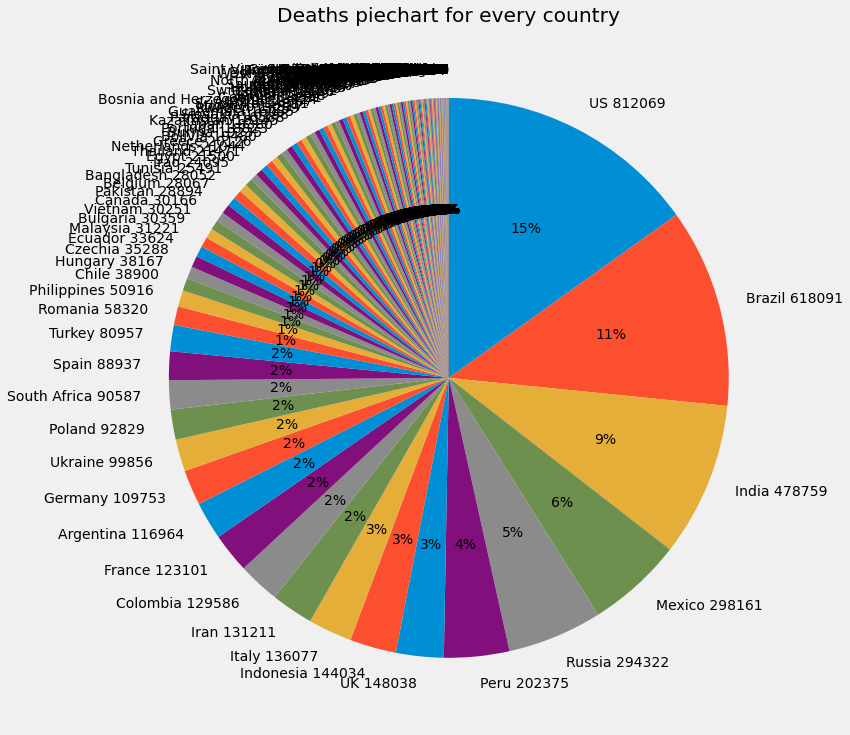

In [35]:
piechart('Deaths')

World total:  6932


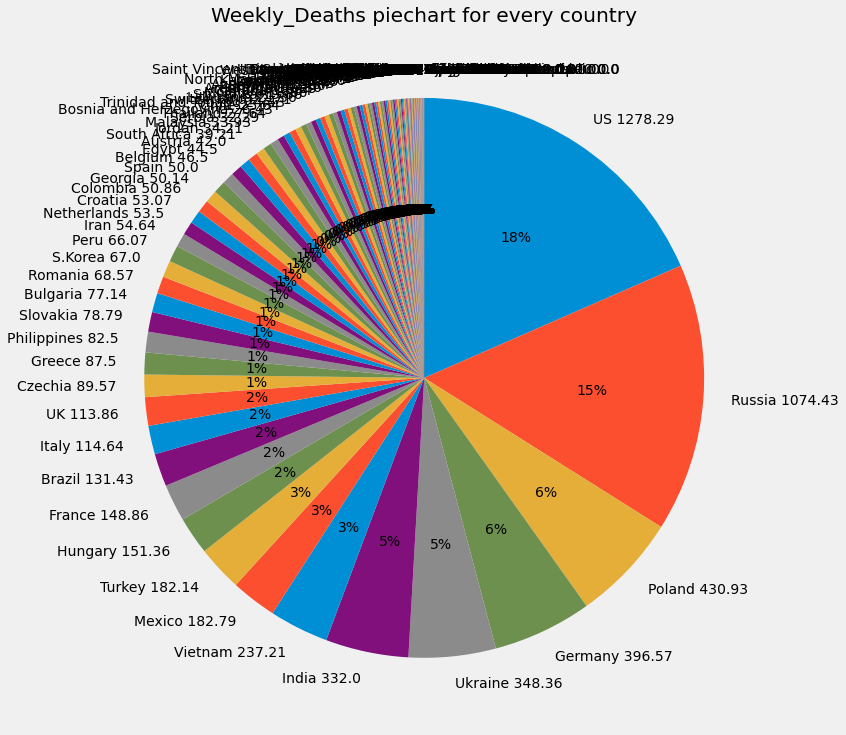

In [36]:
piechart('Weekly_Deaths')

World total:  8036


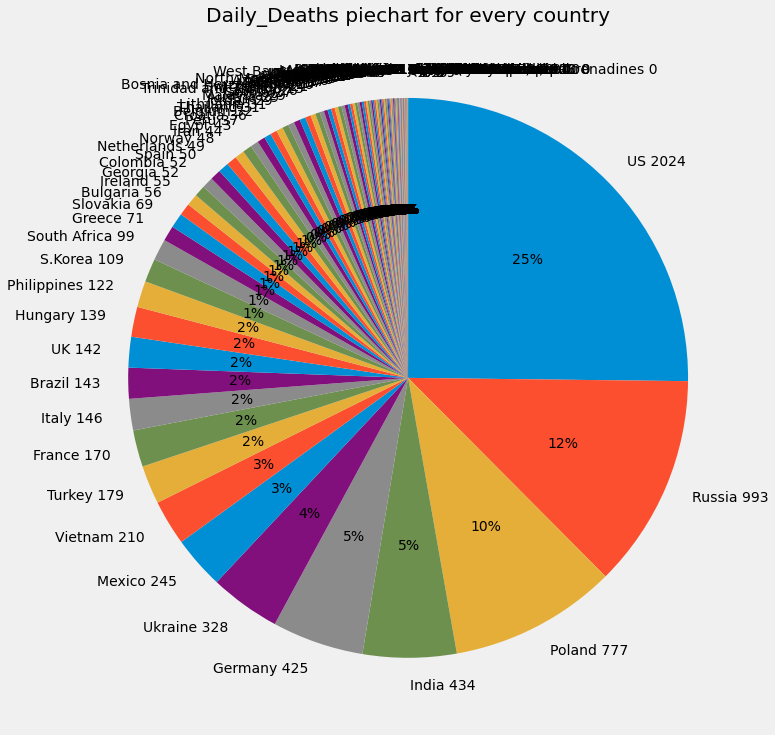

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-12-23


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1075439400.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>